In [1]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D

2024-10-07 14:01:05.743655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 14:01:07.254626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 14:01:07.614905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 14:01:09.937095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-07 14:01:31.518948: W tensorflow/compiler/tf2

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

In [3]:
# image Loader

top_path = '/home/sathish/Downloads/Road Signs classification dataset/DATA'

all_images = []

all_classification = []

for classification_path in os.listdir(top_path):

    for image_path in os.listdir(os.path.join(top_path, classification_path)):

        img=Image.open(os.path.join(top_path, classification_path)+'//'+str(image_path))

        if img.mode != 'RGB': 
            img=img.convert("RGB")

        arr=np.array(img)

        resized_img = np.array(Image.fromarray(arr).resize((32,32)))

        all_images.append(resized_img)

        all_classification.append(classification_path)

x=np.array(all_images)

y= np.array(all_classification)

In [4]:
x

array([[[[ 12,  20,  11],
         [ 22,  30,  21],
         [ 14,  29,  19],
         ...,
         [ 47, 107, 100],
         [ 45,  84,  71],
         [ 39,  80,  64]],

        [[ 12,  20,  10],
         [ 17,  25,  16],
         [ 12,  24,  14],
         ...,
         [ 48,  96,  88],
         [ 60, 102,  87],
         [ 26,  74,  58]],

        [[ 14,  22,  14],
         [ 15,  24,  15],
         [ 19,  29,  20],
         ...,
         [ 79, 121, 111],
         [ 69, 110,  95],
         [ 53,  95,  81]],

        ...,

        [[ 14,  25,  15],
         [ 15,  26,  16],
         [ 16,  31,  17],
         ...,
         [ 18,  29,  27],
         [ 18,  30,  28],
         [  9,  21,  19]],

        [[ 17,  27,  18],
         [ 16,  27,  17],
         [ 17,  33,  15],
         ...,
         [ 16,  27,  25],
         [ 16,  25,  23],
         [ 12,  22,  19]],

        [[ 14,  24,  17],
         [ 16,  26,  18],
         [ 19,  31,  16],
         ...,
         [ 18,  28,  27],
        

In [5]:
y

array(['17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17',
       '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17',
       '17', '17', '17', '26', '26', '26', '26', '26', '26', '26', '26',
       '26', '26', '26', '26', '26', '26', '26', '26', '26', '26', '26',
       '26', '26', '26', '26', '26', '26', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '16', '16', '16', '16', '16', '16',
       '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16',
       '16', '16', '16', '16', '16', '16', '16', '16', '27', '27', '27',
       '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27',
       '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27',
       '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28',
       '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28',
       '28', '28', '28', '24', '24', '24', '24', '24

In [6]:
x.shape

(743, 32, 32, 3)

In [7]:
y.shape

(743,)

In [8]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(594, 32, 32, 3) (149, 32, 32, 3) (594,) (149,)


In [9]:
# Converting the labels into one hot encoding
num_classes = 30
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)
print(y_train_one_hot)
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
inp = Input(shape=(32, 32, 3))
# Define the layers
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(inp)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='valid')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='valid')(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(units=64, activation='relu')(x)
x = Dense(units=30, activation='softmax')(x)

# Create the model
model_custom_cnn = Model(inputs=inp, outputs=x)

# Print the model summary
model_custom_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,726 (1.26 MB)

 Trainable params: 329,726 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:

# Compilation of the model
model_custom_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model_custom_cnn.fit(X_train, y_train_one_hot, batch_size=32, epochs=epochs, validation_data=(X_test, y_test_one_hot))

Epoch 1/15


2024-10-07 14:02:14.490372: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23592960 exceeds 10% of free system memory.
2024-10-07 14:02:14.564486: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2024-10-07 14:02:14.564700: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2024-10-07 14:02:14.603847: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28311552 exceeds 10% of free system memory.


 1/19 ━━━━━━━━━━━━━━━━━━━━ 1:37 5s/step - accuracy: 0.0312 - loss: 57.3296

2024-10-07 14:02:14.701023: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14266368 exceeds 10% of free system memory.


19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 309ms/step - accuracy: 0.0470 - loss: 19.4172 - val_accuracy: 0.0403 - val_loss: 3.3874
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.0390 - loss: 3.3753 - val_accuracy: 0.0336 - val_loss: 3.3667
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.0419 - loss: 3.3132 - val_accuracy: 0.0403 - val_loss: 3.3313
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.0682 - loss: 3.2814 - val_accuracy: 0.0805 - val_loss: 3.2677
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - accuracy: 0.0698 - loss: 3.2250 - val_accuracy: 0.0738 - val_loss: 3.2111
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.0922 - loss: 3.1279 - val_accuracy: 0.1409 - val_loss: 3.0405
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.1674 - loss: 2.8772 - val_accuracy: 0.2349 - val_loss: 2.8539
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - accuracy: 0.2700 - loss: 2.5411 - val_accuracy: 0.3356 - 

In [14]:
model_custom_cnn.save('TCM93.h5')

In [28]:
model_custom_cnn.save('TCM93.keras')

In [30]:
loaded_model = tf.keras.models.load_model("TCM93.keras")

/home/sathish/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [19]:
from tensorflow.keras.models import load_model

In [23]:
model=load_model("TCM93.h5")

In [26]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('TCM93.h5')


In [16]:
import numpy as np

# Predict probabilities
y_pred = model_custom_cnn.predict(X_test)

# Convert probabilities to class labels
y_predict = np.argmax(y_pred, axis=1)

print(y_predict)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
[15  9 22  4 24 16  1  4 20  8 14  1 21 27  9  7  0 18 24 15 26 27 14 10
  2  5 23 29 19 17 25 16  3 27  6  4 12  1 24  3 26 18  1 16  1  7  0 10
 11  7  5 27 14  2  7  9 16  5 23 18 22 18 29 20 21  3 23  1 13 10  4 23
  3  5 29 15 11  7 25  5 26 10  9  7  8 10 12 17  4 14 10 24 21  7 18 16
 11 17  1 15 26 15  8 10 28  0  7  6 10 19 25  3 19 12 16 16 19 25  7 24
 26 28  6  4 10 20 14  3  5 29 23 20  0 29  0  5 15 25 22 11 29 19 16 11
  4  7 22 28 26]


In [34]:
# Create a mapping from string labels to numeric labels

unique_labels = np.unique(y_test)

label_mapping = {label: i for i, label in enumerate(unique_labels)}

In [35]:
#Convert string labels to numeric labels

y_test_numeric = np.array([label_mapping[label] if isinstance(label, str) else label for label in y_test])

y_predict_numeric = np.array([label_mapping[label] if isinstance(label, str) else label for label in y_predict])


In [36]:
# Now calculate the confusion matrix

cm = confusion_matrix(y_test_numeric, y_predict_numeric)

print(cm)

[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0

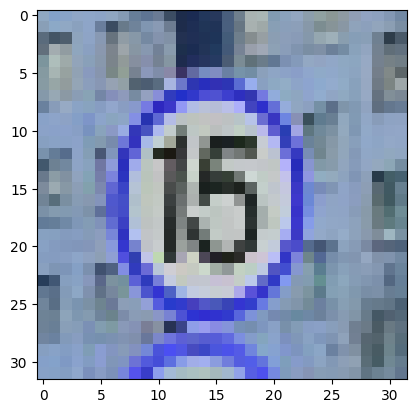

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [34]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("/home/sathish/Downloads/Road Signs classification dataset/TEST/1/001_1_0006_1_j.png",target_size=(32,32,3))
plt.imshow(test_image)
plt.show()
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
model=tf.keras.models.load_model("TCM93.keras")
result=model.predict(test_image)


In [35]:
result

array([[3.63195166e-02, 2.13730978e-04, 5.80673339e-03, 2.38269786e-05,
        6.12727329e-02, 7.64429150e-03, 6.72257665e-05, 2.81726592e-04,
        8.00460204e-02, 5.15797315e-03, 8.66032904e-04, 1.13061313e-02,
        5.02827825e-05, 5.20880148e-03, 3.24331450e-06, 5.72960032e-03,
        2.78172429e-05, 1.23491678e-02, 1.49147729e-06, 1.61809125e-03,
        6.19289219e-01, 2.56810300e-02, 7.89363286e-04, 1.57162845e-02,
        4.40247078e-07, 1.03747085e-01, 7.26531071e-05, 6.04513392e-04,
        3.47305577e-05, 7.02728939e-05]], dtype=float32)

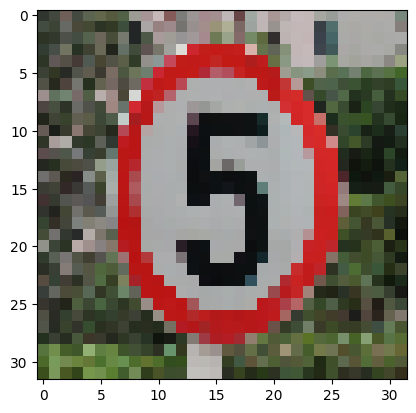

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


In [39]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("/home/sathish/Downloads/Road Signs classification dataset/TEST/0/000_0011.png",target_size=(32,32,3))
plt.imshow(test_image)
plt.show()
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
model=tf.keras.models.load_model("TCM93.keras")
result1=model.predict(test_image)


In [40]:
result1

array([[9.9983609e-01, 1.2360334e-06, 6.9591401e-15, 3.5888192e-10,
        3.1727513e-06, 6.4682829e-12, 1.1817691e-07, 5.9088177e-07,
        6.1841914e-05, 9.4747367e-07, 1.6877458e-11, 9.6608858e-08,
        4.8435909e-14, 9.7908821e-07, 9.1714546e-06, 7.8001940e-06,
        1.5055656e-05, 2.0947176e-10, 1.5382913e-14, 1.5831429e-07,
        1.5394953e-06, 2.5892857e-07, 4.5134971e-08, 4.4058655e-08,
        1.1130835e-11, 6.0784394e-05, 1.7604745e-13, 2.0974442e-10,
        1.4539105e-10, 2.6908432e-12]], dtype=float32)

In [50]:
import pandas as pd
df=pd.read_csv("/home/sathish/Downloads/Road Signs classification dataset/labels.csv")
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Unknown7


In [ ]:
classification=[

In [49]:
list_index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
x=result1
for i in range(30):
    for j in range(30):
        if (x[list_index[i]] > x[list_index[j]]):  # Check if any element is True
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
print(list_index)
    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [47]:
import numpy as np

x = np.array()  # Array with only one element
list_index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] # Adjusted list_index to only include valid indices

for i in range(len(list_index)):
    for j in range(len(list_index)):
        if (x[list_index[i]] > x[list_index[j]]).any():
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

TypeError: array() missing required argument 'object' (pos 0)